## Question 1:
Now that we have done an initial exploratory analysis, let's look into our first question: Is there any age range in which customers are more likely to be interested in a Vehicle Insurance? What is the difference between men and women?

To answer this, let's first read in all necessary libraries and the train data.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Gather

In [3]:
df = pd.read_csv('data/train.csv')
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


## Assess

Let's get an overview of the data. First we look at the type of the data. Then we check if there are any missing values. 

In [8]:
df.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [40]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

The data have no missing values. Let's now have a look at the age data. 

In [46]:
df['Age'].describe()

count    381109.000000
mean         38.822584
std          15.511611
min          20.000000
25%          25.000000
50%          36.000000
75%          49.000000
max          85.000000
Name: Age, dtype: float64

## Analyse

Let's now look at the normalized age distribution in our data:

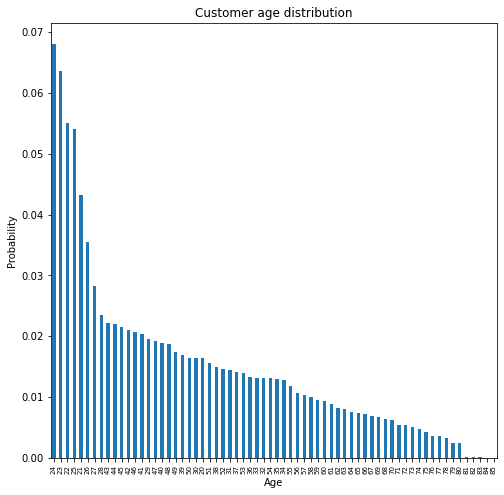

In [33]:
df['Age'].value_counts(normalize=True).plot(kind='bar',figsize=(8,8));
plt.title('Customer age distribution');
plt.ylabel('Probability');  
plt.xlabel('Age');
plt.xticks(fontsize=7);
# OR: (df['Age'].value_counts()/df.shape[0]).plot(kind="bar");

We can see that the largest portion of customers in the data are aged in their twenties. Let's now have a look at the total nbr of customers that already have a vehicle insurance and the nbr of customers that are interested in a vehicle insurance.

In [34]:
df_ins = df[df['Previously_Insured']==1] 
df_pos = df[df['Response']==1]

How are the already insured customers distributed by age? 

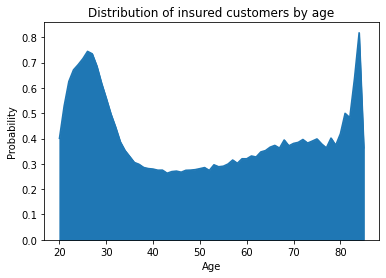

In [35]:
# Normalized distribution
(df_ins['Age'].value_counts()/df['Age'].value_counts()).plot(kind="area");
plt.title("Distribution of insured customers by age");
plt.ylabel('Probability');
plt.xlabel('Age');

We can see that most people aged below 30 and above 70 are already insured. How are the customers interested in a vehicle insurance distributed by age?

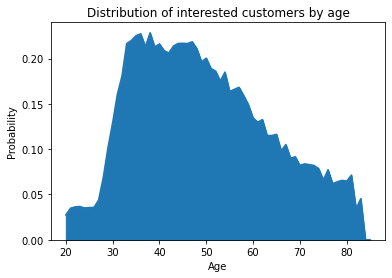

In [36]:
# Normalized distribution
(df_pos['Age'].value_counts()/df['Age'].value_counts()).plot(kind="area");
plt.title("Distribution of interested customers by age");
plt.ylabel('Probability');
plt.xlabel('Age');

We see that the customers that are mostly interested in a vehicle insurance are in the age range of 30 to approx. 50 years old. The interest for an insurance drops abruptly for customers below 30. The interest also drops for people over 50 years old.

## Visualize

Let's now compare these two distributions for women and men. How are the already insured customers distributed by age and gender?

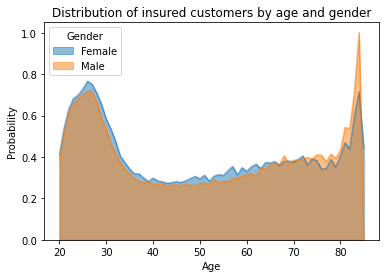

In [38]:
# Normalized distribution

### NOTE: Here this works as above expression because the variable 'Previously_Insured'= 0 or 1. ###
df.groupby(['Age','Gender']).mean()['Previously_Insured'].unstack().plot(kind="area",stacked=False);
plt.title("Distribution of insured customers by age and gender");
plt.ylabel('Probability');
plt.xlabel('Age');
#plt.savefig('1-age-gender-exist.png',dpi=400)

We see that both male and female insured customers follow a similar behavior. What about customers that are not insured but are interested in a vehicle insurance? 

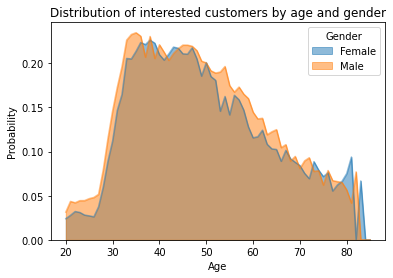

In [39]:
# Normalized distribution

### NOTE: Here this works as above expression because the variable 'Response'= 0 or 1. ###
df.groupby(['Age','Gender']).mean()['Response'].unstack().plot(kind="area",stacked=False);
plt.title("Distribution of interested customers by age and gender");
plt.ylabel('Probability');
plt.xlabel('Age');
#plt.savefig('1-age-gender-interest.png',dpi=400)

Again, both female and male customers seem to follow the same pattern in terms of their interest to get a health insurance. 